In [1]:
from colorscheme import colors

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import pickle

import re
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from scipy import stats
from ezephys import pltools
from statannot import add_stat_annotation

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
plt.rc('text', usetex = False)
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'GIF_benchmarks')
MOD_PATH = os.path.join('data', 'models')

# Benchmarks

In [5]:
def strip_string_from_col_names(dframe, string):
    newdframe = dframe.rename(columns=lambda x: re.sub(string, '', x))
    return newdframe

In [6]:
benchmarks = {}

for celltype in ['5HT', 'GABA', 'mPFC']:
    try:
        benchmarks[celltype] = {}
        for benchtype in ['Md_8', 'R2_V', 'R2_dV']:
            benchmarks[celltype][benchtype] = pd.read_csv(
                os.path.join(MOD_PATH, celltype, '{}_goodcellsbenchmark_{}.csv'.format(celltype, benchtype))
            )
            minified_bench = pd.read_csv(
                os.path.join(MOD_PATH, celltype, '{}_minified_goodcellsbenchmark_{}.csv'.format(celltype, benchtype))
            )
            benchmarks[celltype][benchtype]['minified'] = False
            minified_bench = strip_string_from_col_names(minified_bench, '_minified')
            minified_bench['minified'] = True
            benchmarks[celltype][benchtype] = benchmarks[celltype][benchtype].append(minified_bench, ignore_index=True)
    except IOError:
        warnings.warn('IOError trying to collect {} benchmarks. Skipping.'.format(celltype))

del minified_bench

# Md* benchmarks

## mPFC

In [7]:
piv = benchmarks['mPFC']['Md_8'].melt(
    value_vars=['mPFC_AugmentedGIFs', 'mPFC_GIFs', 'mPFC_iGIF_NPs', 'mPFC_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='Md_8'
)

In [8]:
piv.loc[piv['minified'] == False, ['Md_8', 'model']].groupby('model').mean()

,Md_8
model,
mPFC_AugmentedGIFs,0.741915
mPFC_GIFs,0.783135
mPFC_iGIF_NPs,0.826606
mPFC_iGIF_VRs,0.829239


In [9]:
piv.loc[piv['minified'] == False, ['Md_8', 'model']].groupby('model').sem()

,Md_8
model,
mPFC_AugmentedGIFs,0.067907
mPFC_GIFs,0.050759
mPFC_iGIF_NPs,0.054927
mPFC_iGIF_VRs,0.054074


In [10]:
stats.wilcoxon(
    benchmarks['mPFC']['Md_8'].loc[benchmarks['mPFC']['Md_8']['minified'] == False, 'mPFC_AugmentedGIFs'],
    benchmarks['mPFC']['Md_8'].loc[benchmarks['mPFC']['Md_8']['minified'] == False, 'mPFC_GIFs'],
    correction=True
)

/miniconda3/envs/neopozz/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=7.0, pvalue=0.27189871081964834)

In [11]:
stats.wilcoxon(
    benchmarks['mPFC']['Md_8'].loc[benchmarks['mPFC']['Md_8']['minified'] == False, 'mPFC_AugmentedGIFs'],
    benchmarks['mPFC']['Md_8'].loc[benchmarks['mPFC']['Md_8']['minified'] == False, 'mPFC_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=3.0, pvalue=0.07592696298255763)

In [12]:
stats.wilcoxon(
    benchmarks['mPFC']['Md_8'].loc[benchmarks['mPFC']['Md_8']['minified'] == False, 'mPFC_GIFs'],
    benchmarks['mPFC']['Md_8'].loc[benchmarks['mPFC']['Md_8']['minified'] == False, 'mPFC_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=3.0, pvalue=0.07592696298255763)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
mPFC_GIFs v.s. mPFC_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.102e-01 stat=7.000e+00
('Using zero_method ', 'pratt')
mPFC_AugmentedGIFs v.s. mPFC_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.889e-01 stat=3.000e+00
('Using zero_method ', 'pratt')
mPFC_GIFs v.s. mPFC_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.889e-01 stat=3.000e+00


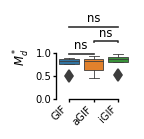

In [26]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs', 'mPFC_iGIF_NPs']
)
add_stat_annotation(
    ax, 
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs', 'mPFC_iGIF_NPs'],
    box_pairs=[
        ('mPFC_GIFs', 'mPFC_AugmentedGIFs'),
        ('mPFC_GIFs', 'mPFC_iGIF_NPs'),
        ('mPFC_AugmentedGIFs', 'mPFC_iGIF_NPs')
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1, 2], ['GIF', 'aGIF', 'iGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$M_d^*$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.35, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_md_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_md_benchmark.svg'))

## 5HT

In [27]:
piv = benchmarks['5HT']['Md_8'].melt(
    value_vars=['5HT_AugmentedGIFs', '5HT_GIFs', '5HT_iGIF_NPs', '5HT_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='Md_8'
)

/miniconda3/envs/neopozz/lib/python2.7/site-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/miniconda3/envs/neopozz/lib/python2.7/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [28]:
piv.loc[piv['minified'] == False, ['Md_8', 'model']].groupby('model').mean()

,Md_8
model,
5HT_AugmentedGIFs,0.483158
5HT_GIFs,0.344406
5HT_iGIF_NPs,0.530943
5HT_iGIF_VRs,NaN


In [29]:
piv.loc[piv['minified'] == False, ['Md_8', 'model']].groupby('model').sem()

,Md_8
model,
5HT_AugmentedGIFs,0.034789
5HT_GIFs,0.027324
5HT_iGIF_NPs,0.036166
5HT_iGIF_VRs,NaN


In [30]:
stats.wilcoxon(
    benchmarks['5HT']['Md_8'].loc[benchmarks['5HT']['Md_8']['minified'] == False, '5HT_AugmentedGIFs'],
    benchmarks['5HT']['Md_8'].loc[benchmarks['5HT']['Md_8']['minified'] == False, '5HT_GIFs'],
    correction=True
)

WilcoxonResult(statistic=2.0, pvalue=0.00030071938552091605)

In [31]:
stats.wilcoxon(
    benchmarks['5HT']['Md_8'].loc[benchmarks['5HT']['Md_8']['minified'] == False, '5HT_AugmentedGIFs'],
    benchmarks['5HT']['Md_8'].loc[benchmarks['5HT']['Md_8']['minified'] == False, '5HT_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=60.0, pvalue=0.276260224405267)

In [32]:
stats.wilcoxon(
    benchmarks['5HT']['Md_8'].loc[benchmarks['5HT']['Md_8']['minified'] == False, '5HT_GIFs'],
    benchmarks['5HT']['Md_8'].loc[benchmarks['5HT']['Md_8']['minified'] == False, '5HT_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=0.0, pvalue=0.00021409202584601804)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
5HT_GIFs v.s. 5HT_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=8.292e-04 stat=2.000e+00
('Using zero_method ', 'pratt')
5HT_AugmentedGIFs v.s. 5HT_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=8.003e-01 stat=6.000e+01
('Using zero_method ', 'pratt')
5HT_GIFs v.s. 5HT_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=5.893e-04 stat=0.000e+00


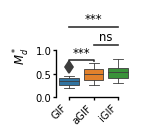

In [34]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['5HT_GIFs', '5HT_AugmentedGIFs', '5HT_iGIF_NPs']
)
add_stat_annotation(
    ax, 
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['5HT_GIFs', '5HT_AugmentedGIFs', '5HT_iGIF_NPs'],
    box_pairs=[
        ('5HT_GIFs', '5HT_AugmentedGIFs'),
        ('5HT_GIFs', '5HT_iGIF_NPs'),
        ('5HT_AugmentedGIFs', '5HT_iGIF_NPs')
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1, 2], ['GIF', 'aGIF', 'iGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$M_d^*$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.35, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_md_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_md_benchmark.svg'))

## SOM

In [35]:
piv = benchmarks['GABA']['Md_8'].melt(
    value_vars=['GABA_AugmentedGIFs', 'GABA_GIFs', 'GABA_iGIF_NPs', 'GABA_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='Md_8'
)

In [36]:
piv.loc[piv['minified'] == False, ['Md_8', 'model']].groupby('model').mean()

,Md_8
model,
GABA_AugmentedGIFs,0.838775
GABA_GIFs,0.818593
GABA_iGIF_NPs,0.892530
GABA_iGIF_VRs,0.887952


In [37]:
piv.loc[piv['minified'] == False, ['Md_8', 'model']].groupby('model').sem()

,Md_8
model,
GABA_AugmentedGIFs,0.031503
GABA_GIFs,0.039294
GABA_iGIF_NPs,0.025148
GABA_iGIF_VRs,0.025613


In [38]:
stats.wilcoxon(
    benchmarks['GABA']['Md_8'].loc[benchmarks['GABA']['Md_8']['minified'] == False, 'GABA_AugmentedGIFs'],
    benchmarks['GABA']['Md_8'].loc[benchmarks['GABA']['Md_8']['minified'] == False, 'GABA_GIFs'],
    correction=True
)

WilcoxonResult(statistic=26.0, pvalue=0.10263977557690805)

In [39]:
stats.wilcoxon(
    benchmarks['GABA']['Md_8'].loc[benchmarks['GABA']['Md_8']['minified'] == False, 'GABA_AugmentedGIFs'],
    benchmarks['GABA']['Md_8'].loc[benchmarks['GABA']['Md_8']['minified'] == False, 'GABA_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=2.0, pvalue=0.0016962723599764757)

In [40]:
stats.wilcoxon(
    benchmarks['GABA']['Md_8'].loc[benchmarks['GABA']['Md_8']['minified'] == False, 'GABA_GIFs'],
    benchmarks['GABA']['Md_8'].loc[benchmarks['GABA']['Md_8']['minified'] == False, 'GABA_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=0.0, pvalue=0.0010970505857231026)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
GABA_GIFs v.s. GABA_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.886e-01 stat=2.600e+01
('Using zero_method ', 'pratt')
GABA_AugmentedGIFs v.s. GABA_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=4.570e-03 stat=2.000e+00
('Using zero_method ', 'pratt')
GABA_GIFs v.s. GABA_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.945e-03 stat=0.000e+00


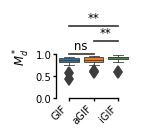

In [41]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['GABA_GIFs', 'GABA_AugmentedGIFs', 'GABA_iGIF_NPs']
)
add_stat_annotation(
    ax, 
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['GABA_GIFs', 'GABA_AugmentedGIFs', 'GABA_iGIF_NPs'],
    box_pairs=[
        ('GABA_GIFs', 'GABA_AugmentedGIFs'),
        ('GABA_GIFs', 'GABA_iGIF_NPs'),
        ('GABA_AugmentedGIFs', 'GABA_iGIF_NPs')
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1, 2], ['GIF', 'aGIF', 'iGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$M_d^*$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.35, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_md_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_md_benchmark.svg'))

# R^2 benchmarks

## mPFC

In [58]:
piv = benchmarks['mPFC']['R2_V'].melt(
    value_vars=['mPFC_AugmentedGIFs', 'mPFC_GIFs', 'mPFC_iGIF_NPs', 'mPFC_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_V'
)

In [59]:
piv.loc[piv['minified'] == False, ['R2_V', 'model']].groupby('model').mean()

,R2_V
model,
mPFC_AugmentedGIFs,0.818511
mPFC_GIFs,0.872893
mPFC_iGIF_NPs,0.872893
mPFC_iGIF_VRs,0.857089


In [60]:
piv.loc[piv['minified'] == False, ['R2_V', 'model']].groupby('model').sem()

,R2_V
model,
mPFC_AugmentedGIFs,0.077205
mPFC_GIFs,0.038106
mPFC_iGIF_NPs,0.038106
mPFC_iGIF_VRs,0.040063


In [61]:
stats.wilcoxon(
    benchmarks['mPFC']['R2_V'].loc[benchmarks['mPFC']['R2_V']['minified'] == False, 'mPFC_AugmentedGIFs'],
    benchmarks['mPFC']['R2_V'].loc[benchmarks['mPFC']['R2_V']['minified'] == False, 'mPFC_GIFs'],
    correction=True
)

WilcoxonResult(statistic=8.0, pvalue=0.3516806827985527)

In [62]:
stats.wilcoxon(
    benchmarks['mPFC']['R2_V'].loc[benchmarks['mPFC']['R2_V']['minified'] == False, 'mPFC_AugmentedGIFs'],
    benchmarks['mPFC']['R2_V'].loc[benchmarks['mPFC']['R2_V']['minified'] == False, 'mPFC_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=8.0, pvalue=0.3516806827985527)

In [63]:
stats.wilcoxon(
    benchmarks['mPFC']['R2_V'].loc[benchmarks['mPFC']['R2_V']['minified'] == False, 'mPFC_GIFs'],
    benchmarks['mPFC']['R2_V'].loc[benchmarks['mPFC']['R2_V']['minified'] == False, 'mPFC_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=0.0, pvalue=nan)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
mPFC_GIFs v.s. mPFC_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.096e-01 stat=8.000e+00


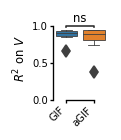

In [65]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs']
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs'],
    box_pairs=[
        ('mPFC_GIFs', 'mPFC_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $V$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_r2_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_r2_benchmark.svg'))

## 5HT

In [66]:
piv = benchmarks['5HT']['R2_V'].melt(
    value_vars=['5HT_AugmentedGIFs', '5HT_GIFs', '5HT_iGIF_NPs', '5HT_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_V'
)

In [67]:
piv.loc[piv['minified'] == False, ['R2_V', 'model']].groupby('model').mean()

,R2_V
model,
5HT_AugmentedGIFs,0.896878
5HT_GIFs,0.906710
5HT_iGIF_NPs,0.906710
5HT_iGIF_VRs,NaN


In [68]:
piv.loc[piv['minified'] == False, ['R2_V', 'model']].groupby('model').sem()

,R2_V
model,
5HT_AugmentedGIFs,0.023140
5HT_GIFs,0.015665
5HT_iGIF_NPs,0.015665
5HT_iGIF_VRs,NaN


In [69]:
stats.wilcoxon(
    benchmarks['5HT']['R2_V'].loc[benchmarks['5HT']['R2_V']['minified'] == False, '5HT_AugmentedGIFs'],
    benchmarks['5HT']['R2_V'].loc[benchmarks['5HT']['R2_V']['minified'] == False, '5HT_GIFs'],
    correction=True
)

WilcoxonResult(statistic=66.0, pvalue=0.4079782223524976)

In [70]:
stats.wilcoxon(
    benchmarks['5HT']['R2_V'].loc[benchmarks['5HT']['R2_V']['minified'] == False, '5HT_AugmentedGIFs'],
    benchmarks['5HT']['R2_V'].loc[benchmarks['5HT']['R2_V']['minified'] == False, '5HT_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=66.0, pvalue=0.4079782223524976)

In [71]:
stats.wilcoxon(
    benchmarks['5HT']['R2_V'].loc[benchmarks['5HT']['R2_V']['minified'] == False, '5HT_GIFs'],
    benchmarks['5HT']['R2_V'].loc[benchmarks['5HT']['R2_V']['minified'] == False, '5HT_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=0.0, pvalue=nan)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
5HT_GIFs v.s. 5HT_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.958e-01 stat=6.600e+01


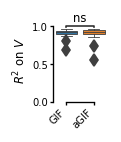

In [73]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['5HT_GIFs', '5HT_AugmentedGIFs']
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['5HT_GIFs', '5HT_AugmentedGIFs'],
    box_pairs=[
        ('5HT_GIFs', '5HT_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $V$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_r2_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_r2_benchmark.svg'))

## SOM

In [74]:
piv = benchmarks['GABA']['R2_V'].melt(
    value_vars=['GABA_AugmentedGIFs', 'GABA_GIFs', 'GABA_iGIF_NPs', 'GABA_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_V'
)

In [75]:
piv.loc[piv['minified'] == False, ['R2_V', 'model']].groupby('model').mean()

,R2_V
model,
GABA_AugmentedGIFs,0.944784
GABA_GIFs,0.940889
GABA_iGIF_NPs,0.940889
GABA_iGIF_VRs,0.929410


In [76]:
piv.loc[piv['minified'] == False, ['R2_V', 'model']].groupby('model').sem()

,R2_V
model,
GABA_AugmentedGIFs,0.004840
GABA_GIFs,0.004800
GABA_iGIF_NPs,0.004800
GABA_iGIF_VRs,0.007402


In [77]:
stats.wilcoxon(
    benchmarks['GABA']['R2_V'].loc[benchmarks['GABA']['R2_V']['minified'] == False, 'GABA_AugmentedGIFs'],
    benchmarks['GABA']['R2_V'].loc[benchmarks['GABA']['R2_V']['minified'] == False, 'GABA_GIFs'],
    correction=True
)

WilcoxonResult(statistic=23.0, pvalue=0.06868016073035406)

In [78]:
stats.wilcoxon(
    benchmarks['GABA']['R2_V'].loc[benchmarks['GABA']['R2_V']['minified'] == False, 'GABA_AugmentedGIFs'],
    benchmarks['GABA']['R2_V'].loc[benchmarks['GABA']['R2_V']['minified'] == False, 'GABA_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=23.0, pvalue=0.06868016073035406)

In [79]:
stats.wilcoxon(
    benchmarks['GABA']['R2_V'].loc[benchmarks['GABA']['R2_V']['minified'] == False, 'GABA_GIFs'],
    benchmarks['GABA']['R2_V'].loc[benchmarks['GABA']['R2_V']['minified'] == False, 'GABA_iGIF_NPs'],
    correction=True
)

WilcoxonResult(statistic=0.0, pvalue=nan)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
GABA_GIFs v.s. GABA_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=6.404e-02 stat=2.300e+01


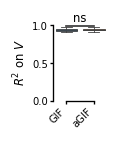

In [81]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['GABA_GIFs', 'GABA_AugmentedGIFs']
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['GABA_GIFs', 'GABA_AugmentedGIFs'],
    box_pairs=[
        ('GABA_GIFs', 'GABA_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $V$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.9, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_r2_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_r2_benchmark.svg'))